1. Import and Load the Data
•	Import required libraries (pandas, numpy, matplotlib, seaborn, sklearn, etc.)
•	Load the dataset and explore the structure using .head(), .info() and .describe()

In [1]:
import pandas as pd

In [63]:
df=pd.read_csv("Medical Insurance cost prediction.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1337, 7)

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  20.790  0         no      southeast  1607.51010     1
             21.660  0         yes     northeast  14283.45940    1
             24.090  1         no      southeast  2201.09710     1
             25.080  0         no      northeast  2196.47320     1
             26.315  0         no      northeast  2198.18985     1
                                                                ..
64   male    36.960  2         yes     southeast  49577.66240    1
             37.905  0         no      northwest  14210.53595    1
             38.190  0         no      northeast  14410.93210    1
             39.160  1         no      southeast  14418.28040    1
             40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

2. Exploratory Data Analysis (EDA)
•	Visualize the distribution of each feature
•	Understand correlations (especially with the target variable)
•	Check for variables distributions.
•	Summarize insights from EDA

In [15]:
numerical_df= ["age","bmi","children"]
categorical_df = ["sex","smoker","region"]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

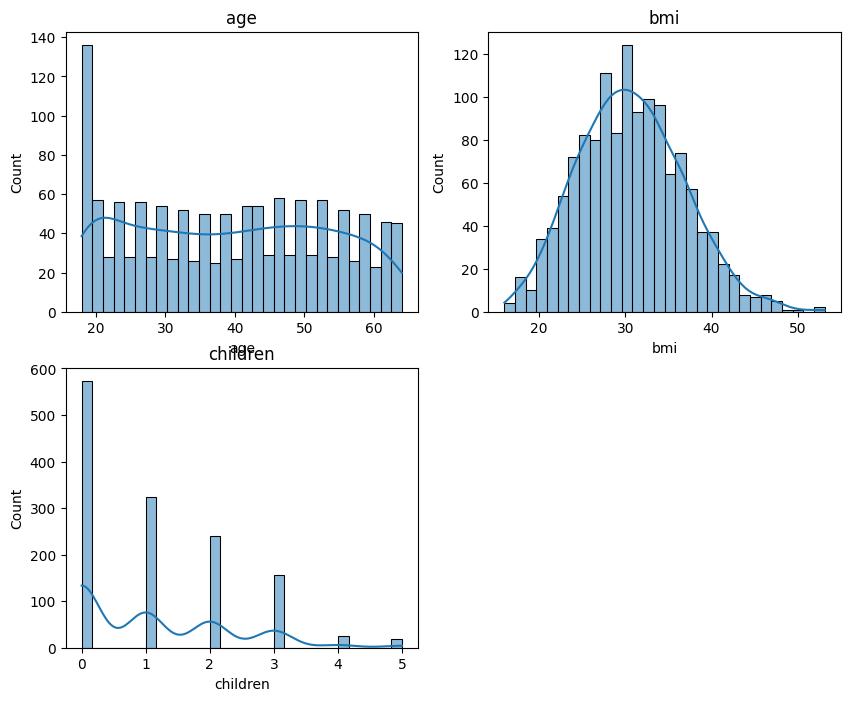

In [17]:
plt.figure(figsize=(10,8))
for i, col in enumerate(numerical_df, start=1):
    plt.subplot(2, 2,i)
    sns.histplot(x=df[col],kde=True, bins=30)
    plt.title(col)
plt.show()

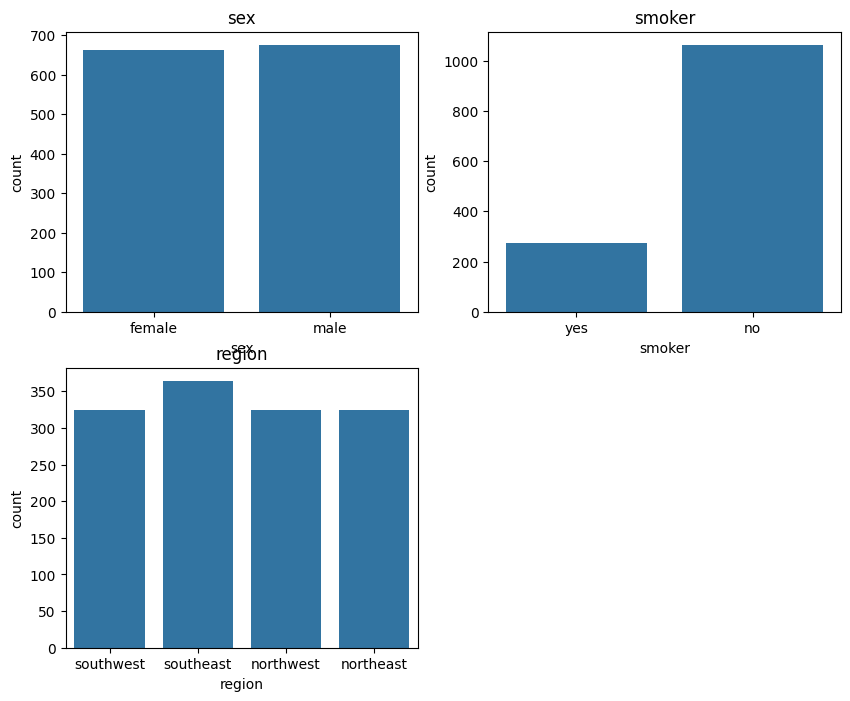

In [18]:
plt.figure(figsize=(10,8))
for i, col in enumerate(categorical_df, start=1):
    plt.subplot(2, 2,i)
    sns.countplot(x=df[col])
    plt.title(col)
plt.show()

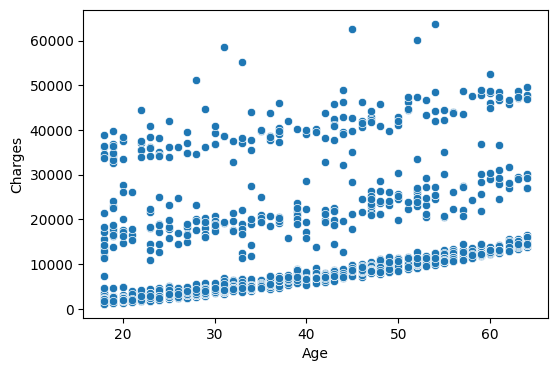

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges",data=df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

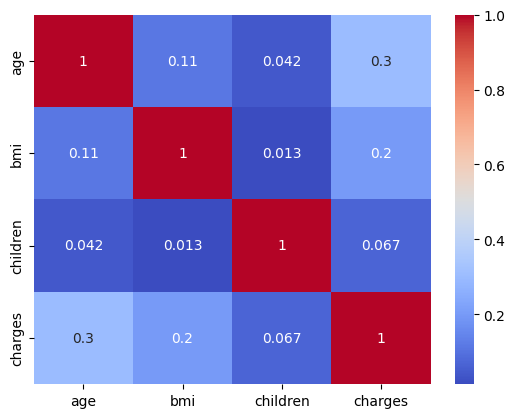

In [20]:
corr = df[numerical_df + ["charges"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Insights from heatmap
##### age and charges are moderately positive correlated and other variables are uncorrelated with charges
##### age and bmi are uncorrelated, children and bmi are uncorrelated

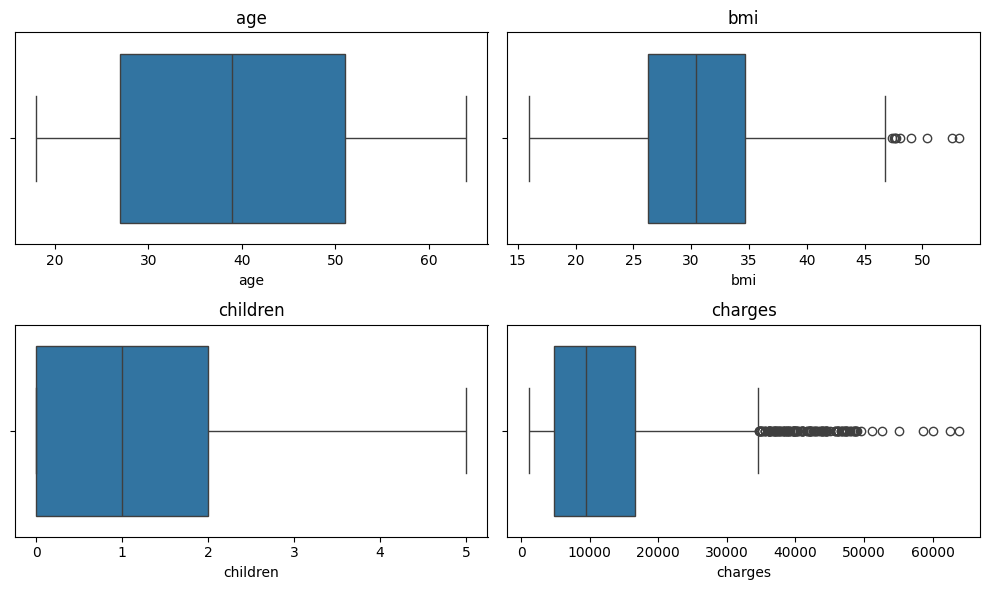

In [21]:
plt.figure(figsize=(10,6))
for i,col in enumerate(numerical_df+["charges"], start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout(); plt.show()

Insights from EDA
##### Charges are right skewed with outliers.
##### Charges are more for higher age when compared to lower age.
##### age and charges are moderately positive correlated and other variables are uncorrelated with charges.
##### age and Smoker variable is a important variable for charges prediction 

##### 3. Missing Values & Outlier Treatment
##### Check for missing values and treat them if any
##### Check if there are anu outliers.

In [22]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def treat_outliers(df):
    df_treated = df.copy()
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    numerical_cols = [c for c in numerical_cols if c != 'charges']
    
    for col in numerical_cols:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
    
        df_treated[col] = np.where(
            df_treated[col] > upper, upper,
            np.where(df_treated[col] < lower, lower, df_treated[col])
        )
    
    return df_treated

df_treated = treat_outliers(df)


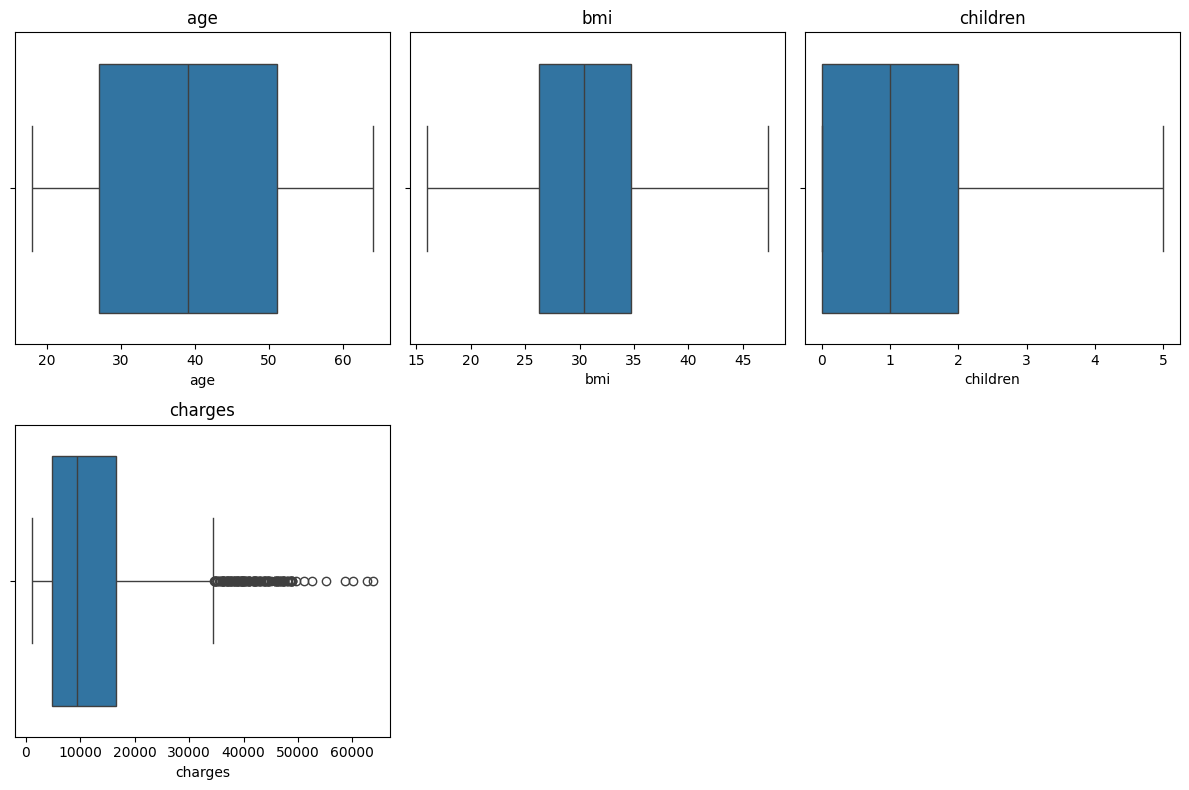

In [24]:
numeric_cols = df_treated.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_treated[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [25]:
df1=df_treated.copy()

In [26]:
numerical_df1= ["age","bmi","children"]
categorical_df1 = ["sex","smoker","region"]

##### 4. Feature Engineering & Preprocessing
##### •	Encode categorical variables (sex, smoker, region)
##### •	Feature scaling for numerical values (StandardScaler / MinMaxScaler)
##### •	Check for skewness and treat it if required.

In [27]:
from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df1, columns=categorical_df1, drop_first=True)

for col in numerical_df1:
    if abs(df_encoded[col].skew()) > 1:
        df_encoded[col] = np.log1p(df_encoded[col])
        
scaler = StandardScaler()
df_encoded[numerical_df1] = scaler.fit_transform(df_encoded[numerical_df])

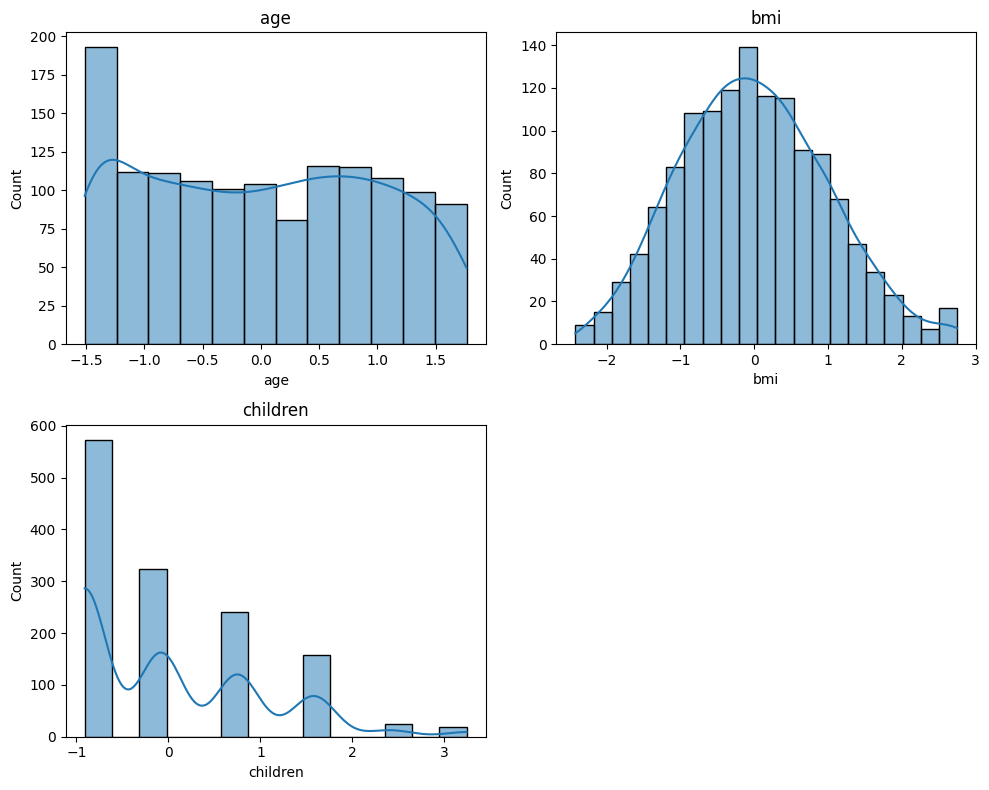

In [28]:
plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_df1, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [33]:
num_cols = df_encoded.select_dtypes(include=[np.number]).columns
cat_cols = df_encoded.select_dtypes(exclude=[np.number]).columns

df_encoded[num_cols] = df_encoded[num_cols].fillna(df_encoded[num_cols].mean())

df_encoded[cat_cols] = df_encoded[cat_cols].fillna(df_encoded[cat_cols].mode().iloc[0])

In [34]:
df1=df_encoded.copy()

5. Model Building: Try Multiple Regressors

In [39]:
from sklearn.model_selection import train_test_split

x = df1.drop("charges", axis=1)
y = df1["charges"]           
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)  
y_pred_linear= linear_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("R-squared-train:", r2_score(y_train,linear_model.predict(x_train)))
print("R-squared:", r2_score(y_test, y_pred_linear))

Mean Absolute Error: 4181.898078654738
R-squared-train: 0.7299938232777323
R-squared: 0.8070654032596751


In [40]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge

In [41]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)  
y_pred_ridge= ridge_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("R-squared-train:", r2_score(y_train, ridge_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_ridge))

Mean Absolute Error: 4198.72579289978
R-squared-train: 0.7299720316569067
R-squared-test: 0.806058606719823


In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt_model = DecisionTreeRegressor(random_state=42,max_depth=5,min_samples_split=10,min_samples_leaf=5)
dt_model.fit(x_train, y_train) 
y_pred_dt = dt_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("R-squared-train:", r2_score(y_train, dt_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_dt))

Mean Absolute Error: 2644.1597522221514
R-squared-train: 0.8657306460150244
R-squared-test: 0.895776025882278


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf_model = RandomForestRegressor(random_state=42,max_depth=5,min_samples_split=10,min_samples_leaf=5)
rf_model.fit(x_train, y_train) 
y_pred_rf = rf_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("R-squared-train:", r2_score(y_train, rf_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_rf))

Mean Absolute Error: 2383.76317184324
R-squared-train: 0.8732878789521904
R-squared-test: 0.9030236710542566


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train) 
y_pred_gb = gb_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("R-squared-train:", r2_score(y_train, gb_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_gb))

Mean Absolute Error: 2499.1376007290246
R-squared-train: 0.8919396229435116
R-squared-test: 0.9016493159941209


In [50]:
import xgboost
from xgboost import XGBRegressor

In [51]:
xgb_model = XGBRegressor(random_state=42,max_depth=5)
xgb_model.fit(x_train, y_train) 
y_pred_xgb = xgb_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_xgb))
print("R-squared-train:", r2_score(y_train, xgb_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_xgb))

Mean Absolute Error: 2891.654148057165
R-squared-train: 0.9853449829602541
R-squared-test: 0.8649563526664781


In [52]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, epsilon=100)
svr_model.fit(x_train, y_train) 
y_pred_svr = svr_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("R-squared-train:", r2_score(y_train, svr_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_svr))

Mean Absolute Error: 7230.574752472393
R-squared-train: 0.01410322098628225
R-squared-test: -0.01972838689562928


In [53]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 2)
knn_model.fit(x_train, y_train) 
y_pred_knn= knn_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("R-squared-train:", r2_score(y_train, knn_model.predict(x_train)))
print("R-squared-test:", r2_score(y_test, y_pred_knn))

Mean Absolute Error: 4089.199112261194
R-squared-train: 0.9029679222659528
R-squared-test: 0.6195839716105813


7. Hyperparameter Tuning

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid = GridSearchCV(xgb, params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

best_xgb = grid.best_estimator_
y_pred_best = best_xgb.predict(x_test)
print("Train R2:",r2_score(y_train, best_xgb.predict(x_train)))
print("Test R2:", r2_score(y_test, y_pred_best))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))


Train R2: 0.872547242319302
Test R2: 0.9018689352384326
Test MAE: 2481.90754461264


8. Model Comparison Table

In [57]:
models = {
    "Linear Regression": linear_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "SVM" : svr_model,
    "KNN" : knn_model,
    "XGB": best_xgb
}

results = []

for name, model in models.items():
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    overfitting = "Y" if (train_r2 - test_r2) > 0.1 else "N"

    results.append([name, train_rmse, test_rmse, train_r2, test_r2, overfitting])

results_df = pd.DataFrame(results, columns=[
    "Model", "Train RMSE", "Test RMSE", "Train R²", "Test R²", "Overfitting (Y/N)"
])

print(results_df)

               Model    Train RMSE     Test RMSE  Train R²   Test R²  \
0  Linear Regression   6080.115675   5954.233965  0.729994  0.807065   
1      Decision Tree   4287.591901   4376.275501  0.865731  0.895776   
2      Random Forest   4165.182860   4221.372823  0.873288  0.903024   
3  Gradient Boosting   3846.433527   4251.180376  0.891940  0.901649   
4                SVM  11618.249966  13688.728019  0.014103 -0.019728   
5                KNN   3644.875158   8360.846373  0.902968  0.619584   
6                XGB   4177.337941   4246.431233  0.872547  0.901869   

  Overfitting (Y/N)  
0                 N  
1                 N  
2                 N  
3                 N  
4                 N  
5                 Y  
6                 N  


In [62]:
import joblib 

joblib.dump(gb_model,"Medical Insurance cost prediction.pkl")

['Medical Insurance cost prediction.pkl']

In [65]:
import pickle

from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(x_train, y_train)

with open("Medical_Insurance_cost_prediction.pkl", "wb") as f:
    pickle.dump(model, f)